In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

%matplotlib inline

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-06-10 16:37:43--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2020-06-10 16:37:44 (13.4 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.drop(columns=['Unnamed: 2',"Unnamed: 3","Unnamed: 4"],inplace=True)
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


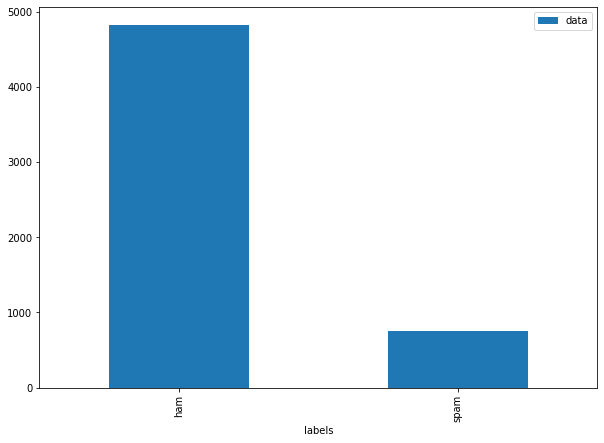

In [5]:
df.groupby('labels').count().plot(kind='bar',figsize=(10,7))

In [6]:
# Mapping the labels
df['labels'] = df['labels'].map({'ham':0,'spam':1})
df.head()

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
Y = df['labels'].values
df_train,df_test, y_train, y_test = train_test_split(df['data'],Y,test_size=0.33) 

In [0]:

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [10]:
word2idx = tokenizer.index_word
V = len(word2idx)
print ("Total unique words found: {}".format(V))
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]
data_test = pad_sequences(sequences_test,maxlen=T)
print ("Shape of the data train tensor: {}".format(data_train.shape))

Total unique words found: 7233
Shape of the data train tensor: (3733, 189)


In [11]:
D = 30 # Embedding dimensionality
M = 15 # Number of hidden units

# V + 1 because in the word embeddings the indices starts from 1 not from zero
# Hence adding 1 to V to tackle this problem.
i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print ("Training model.....")

r = model.fit(
    data_train,y_train,
    epochs=15,
    validation_data=(data_test,y_test)
)

Training model.....
Epoch 1/15
117/117 [==============================] - 9s 78ms/step - loss: 0.4435 - accuracy: 0.8666 - val_loss: 0.3821 - val_accuracy: 0.8646
Epoch 2/15
117/117 [==============================] - 9s 75ms/step - loss: 0.3142 - accuracy: 0.8666 - val_loss: 0.2549 - val_accuracy: 0.8646
Epoch 3/15
117/117 [==============================] - 9s 76ms/step - loss: 0.2075 - accuracy: 0.8757 - val_loss: 0.1814 - val_accuracy: 0.9473
Epoch 4/15
117/117 [==============================] - 9s 76ms/step - loss: 0.1302 - accuracy: 0.9829 - val_loss: 0.1066 - val_accuracy: 0.9842
Epoch 5/15
117/117 [==============================] - 9s 77ms/step - loss: 0.0735 - accuracy: 0.9904 - val_loss: 0.0729 - val_accuracy: 0.9848
Epoch 6/15
117/117 [==============================] - 9s 77ms/step - loss: 0.0478 - accuracy: 0.9930 - val_loss: 0.0742 - val_accuracy: 0.9837
Epoch 7/15
117/117 [==============================] - 9s 76ms/step - loss: 0.0295 - accuracy: 0.9949 - val_loss: 0.0566 - 

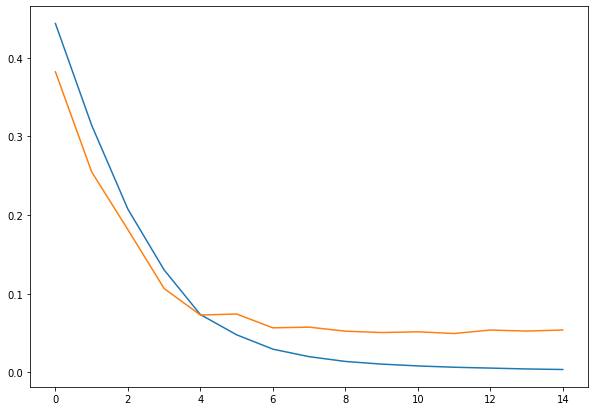

In [13]:
  plt.figure(figsize=(10,7))
  plt.plot(r.history['loss'],label='loss')
  plt.plot(r.history['val_loss'],label='val_loss')
  plt.show()

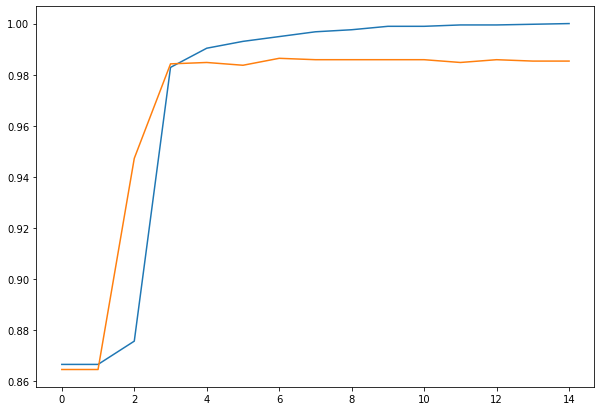

In [14]:
  plt.figure(figsize=(10,7))
  plt.plot(r.history['accuracy'],label='acc')
  plt.plot(r.history['val_accuracy'],label='val_acc')
  plt.show()